### Page View Time Series Visualizer

This is part of the [freeCodeCamp Projects](https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer) and Dataset can also be found on: https://www.kaggle.com/datasets/xyznihal/fcc-forum-pageviews

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:

• Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

• Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

• Create a line plot. The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

• Create a bar plot that shows average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

• Create two adjacent box plots. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv(r"your_path\fcc-forum-pageviews.csv",
                 parse_dates=["date"], index_col=["date"])

# Clean data
df = df[(df["value"]>df["value"].quantile(0.0025)) & (df["value"]<df["value"].quantile(0.975))]


<Figure size 640x480 with 0 Axes>

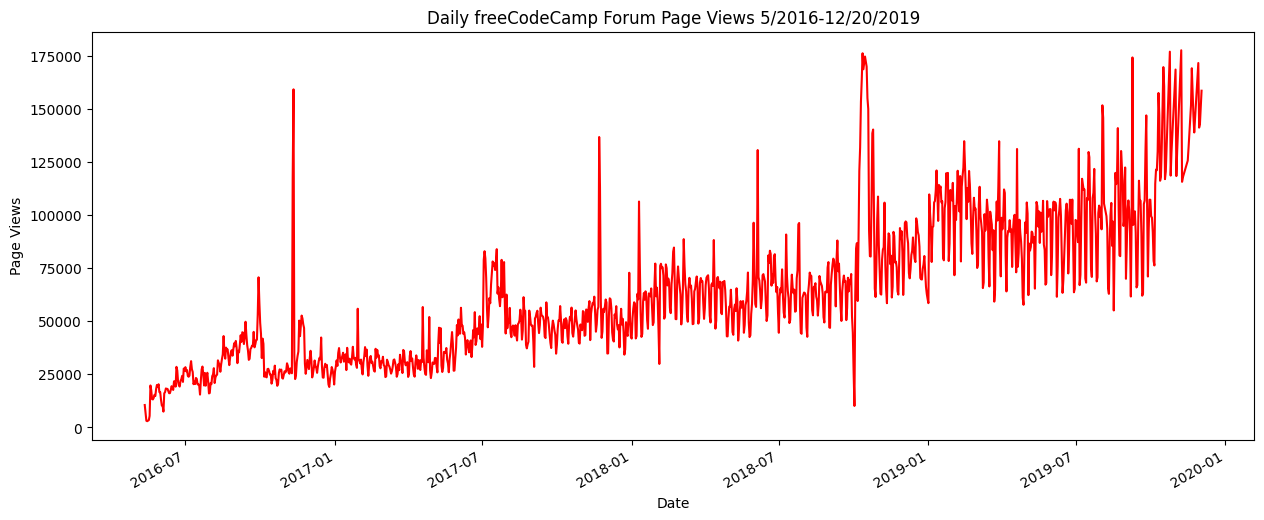

In [9]:
#Draw line Plot:
plt.clf()
df.plot(figsize=(15,6), title="Daily freeCodeCamp Forum Page Views 5/2016-12/20/2019", legend= False, color="red")
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.show()


<Figure size 640x480 with 0 Axes>

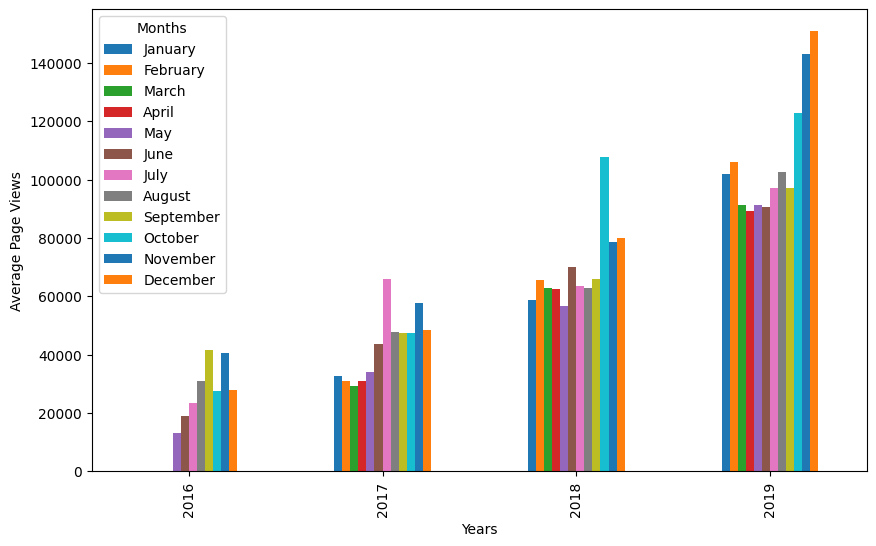

In [ ]:
#Draw bar plots

plt.clf()

df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%b') for d in df_bar.date]

grouped_df=df_bar.groupby(["year", "month"])["value"].mean().unstack()

new_months = { "Jun" : "June",
    "Jul" : "July",
    "Aug" : "August",
    "Sep" : "September",
    "Oct" : "October",
    "Nov" : "November",
    "Dec" : "December",
    "Jan" : "January",
    "Feb" : "February",
    "Mar" : "March",
    "Apr" : "April"
    }

grouped_df=grouped_df.rename(columns=new_months)

months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
    ]

grouped_df=grouped_df[months_order]

fig, ax = plt.subplots(figsize=(10, 6))
grouped_df.plot(kind="bar", ax=ax)
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
ax.legend(title="Months")

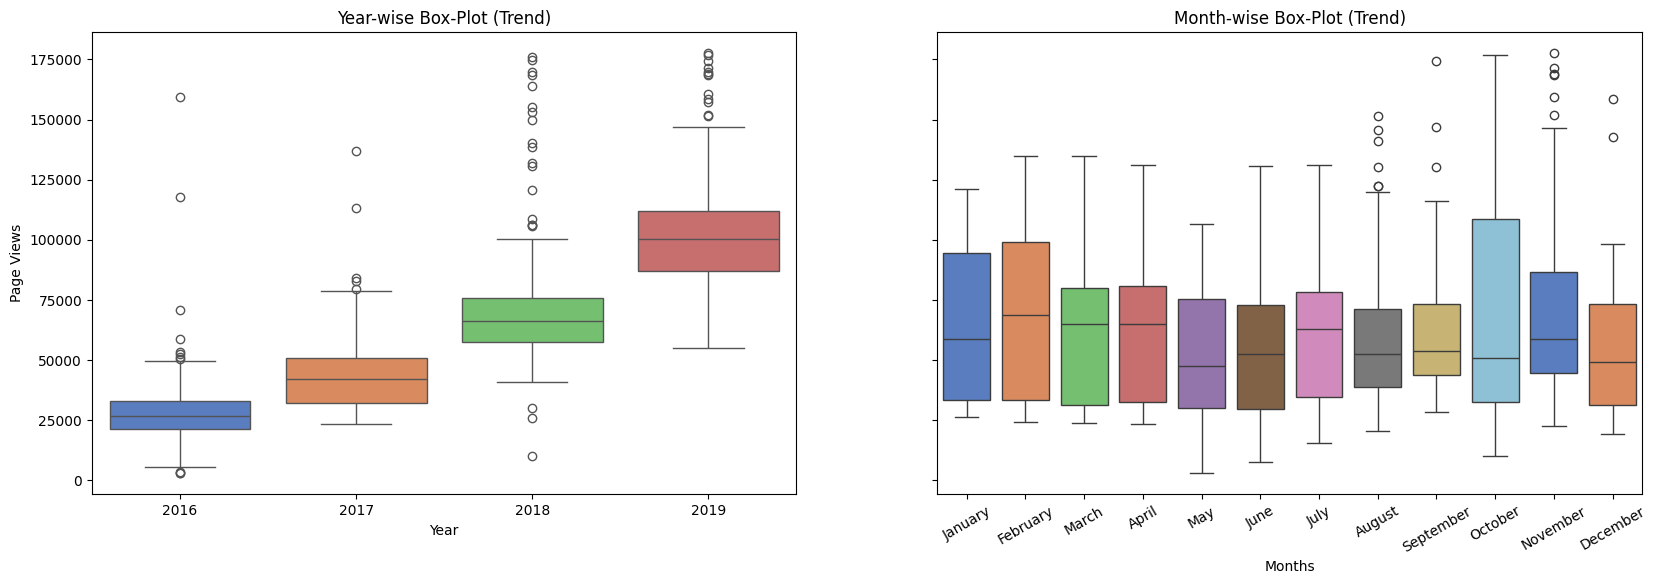

In [ ]:
#Draw boxplots

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]   

month_map = {
"Jan": "January", "Feb": "February", "Mar": "March",
"Apr": "April", "May": "May", "Jun": "June",
"Jul": "July", "Aug": "August", "Sep": "September",
"Oct": "October", "Nov": "November", "Dec": "December"
}

df_box["month"] = df_box["month"].map(month_map)

df_box["month"] = pd.Categorical(df_box["month"], categories=months_order, ordered=True)

fig, axes= plt.subplots (1,2, figsize=(20,6), sharey=True)

sns.boxplot(df_box, x="year", y="value", ax=axes[0], palette="muted")
axes[0].set_title("Year-wise Box-Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")

sns.boxplot(df_box, x="month", y="value", ax=axes[1], palette="muted")
axes[1].set_title("Month-wise Box-Plot (Trend)")
axes[1].set_xlabel("Months")
axes[1].set_ylabel("Page Views")
axes[1].tick_params(axis="x", rotation=30)
